<a href="https://colab.research.google.com/github/ryoojunsang/2023S-Ajou-ML/blob/main/kaggle_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_rand():
    X=[]
    #dir_path='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
    dir_path='/content/drive/MyDrive/MACHINE/fruit_images'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for sub_dir2 in tqdm(os.listdir(path_main)):
          path_main2=os.path.join(path_main,sub_dir2)
          i=0
          for img_name in os.listdir(path_main2):
              if i>=6:
                  break
              img=cv2.imread(os.path.join(path_main2,img_name))
              img=cv2.resize(img,(100,100))
              img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
              X.append(img)
              i+=1
    return X

In [ ]:
X=load_rand()

  0%|          | 0/2 [00:00<?, ?it/s]

rotten



 50%|█████     | 1/2 [00:00<00:00,  2.04it/s]

fresh



100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


In [ ]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [ ]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['freshwatermelone', 'freshstrawberry', 'freshtomato', 'rottenwatermelone', 'rottenstrawberry', 'rottentomato']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

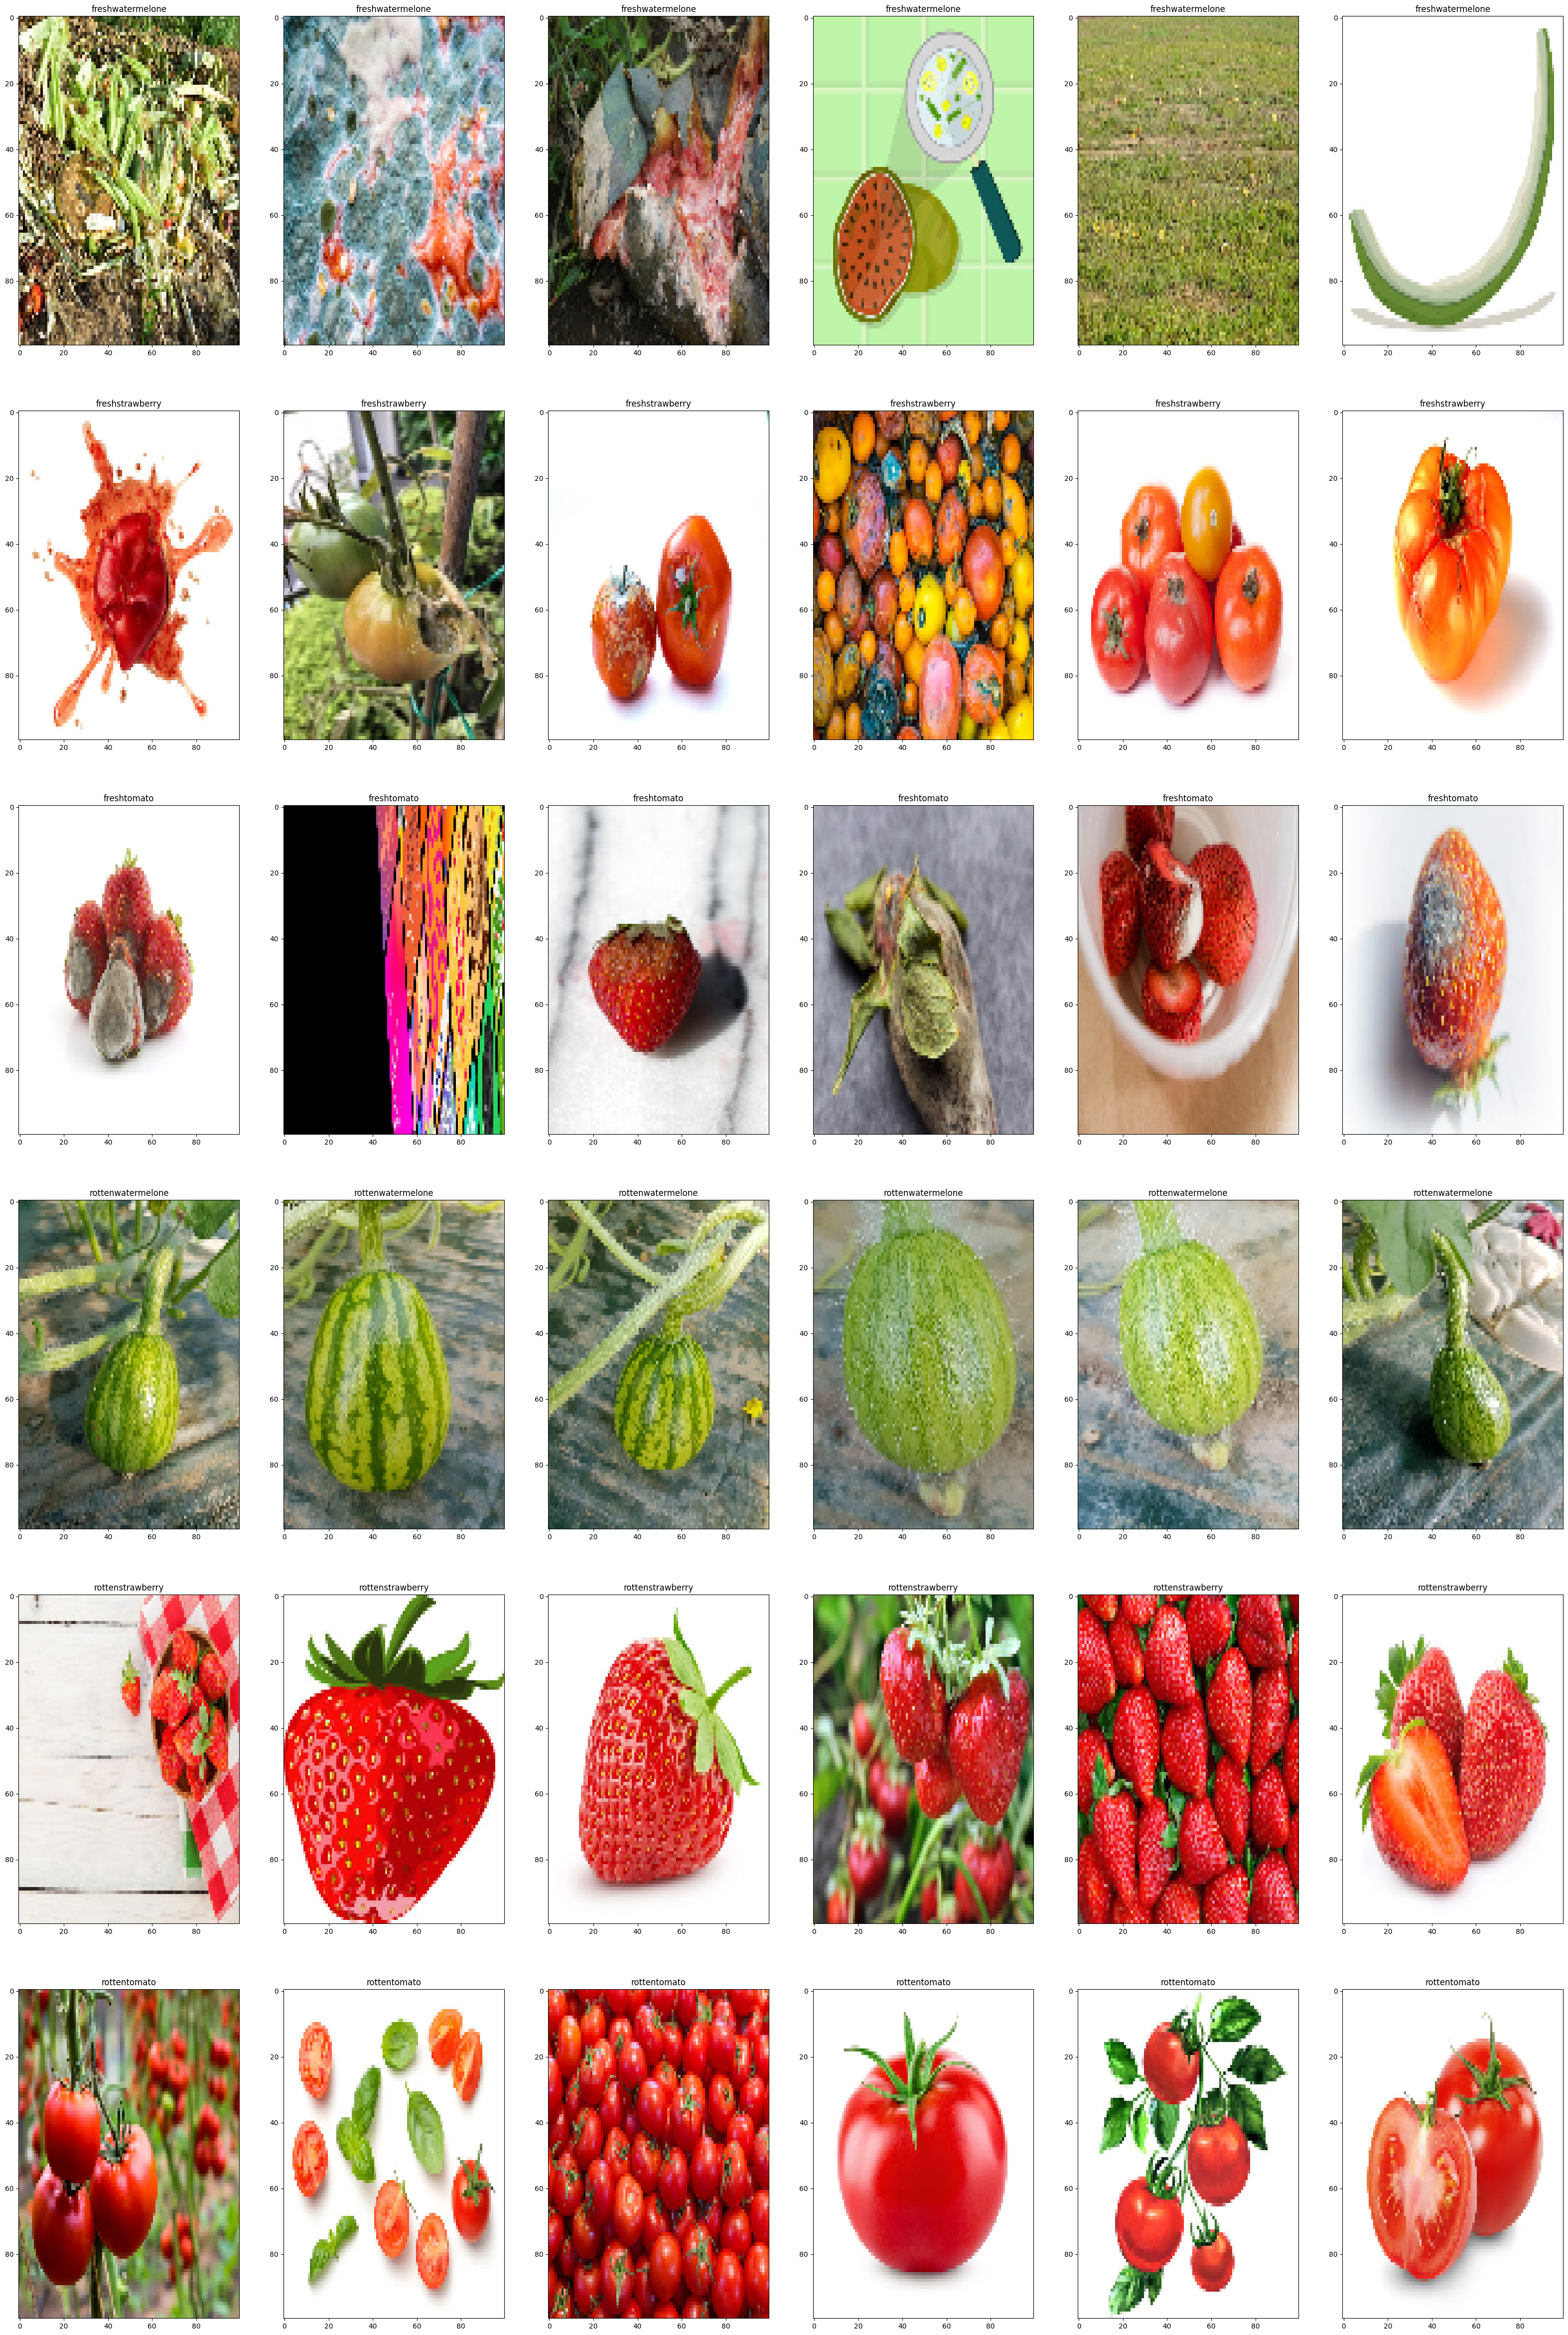

In [ ]:
show_subpot(X)

In [ ]:
del X

# Rotten vs fresh

In [ ]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    main_dir = '/content/drive/MyDrive/MACHINE/fruit_images'
    for cata in tqdm(os.listdir(main_dir)):
        print(cata)
        if quality[0] == cata:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,0])
        else:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
X,Y=load_rottenvsfresh()

  0%|          | 0/2 [00:00<?, ?it/s]

rotten


 50%|█████     | 1/2 [00:05<00:05,  5.58s/it]

fresh


100%|██████████| 2/2 [01:02<00:00, 31.08s/it]


Shuffling your data.....


100%|██████████| 1720/1720 [00:00<00:00, 690817.09it/s]


In [ ]:
Y=np.array(Y)
X=np.array(X)
print(X)
print(Y)

[[[[116  81  53]
   [ 98  64  38]
   [106  70  43]
   ...
   [162 132 125]
   [160 129 116]
   [179 146 127]]

  [[101  69  46]
   [108  73  48]
   [112  73  47]
   ...
   [172 141 120]
   [182 148 123]
   [170 136 113]]

  [[102  68  43]
   [102  67  41]
   [118  81  55]
   ...
   [170 132 109]
   [163 130 114]
   [171 135 120]]

  ...

  [[ 53  30   8]
   [ 22  10   2]
   [ 20   9   3]
   ...
   [106  78  69]
   [102  74  65]
   [105  77  67]]

  [[ 52  27   5]
   [ 29  15   4]
   [ 27  14   6]
   ...
   [113  85  66]
   [113  84  66]
   [122  93  75]]

  [[ 47  23   5]
   [ 32  17   9]
   [ 15   5   5]
   ...
   [102  73  56]
   [114  83  63]
   [122  91  68]]]


 [[[ 58  42  33]
   [ 38  18  14]
   [ 66  40  36]
   ...
   [ 98  84  33]
   [114 115  78]
   [101  94  47]]

  [[ 51  37  28]
   [ 81  62  61]
   [ 74  59  50]
   ...
   [126 109  31]
   [ 86  84  47]
   [108 114  79]]

  [[ 55  32  22]
   [ 77  66  63]
   [ 46  26  21]
   ...
   [115 113  73]
   [118 127  96]
   [101 111

In [ ]:
y_ser=pd.Series(Y)
y_ser.value_counts()

0    863
1    857
dtype: int64

In [ ]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    main_dir = '/content/drive/MyDrive/MACHINE/fruit_images'
    for cata in tqdm(os.listdir(main_dir)):
        print(cata)
        if quality[0] == cata:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,0])
        else:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
X_val,Y_val=load_rottenvsfresh_valset()

  0%|          | 0/2 [00:00<?, ?it/s]

rotten


 50%|█████     | 1/2 [00:06<00:06,  6.61s/it]

fresh


100%|██████████| 2/2 [01:02<00:00, 31.38s/it]


Shuffling your data.....


100%|██████████| 1720/1720 [00:00<00:00, 936666.18it/s]


In [ ]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

0    863
1    857
dtype: int64

In [ ]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 32)     128       
 ormalization)                                                   
                                                                 
 separable_conv2d (Separable  (None, 100, 100, 32)     1344      
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                        

In [ ]:
import tensorflow as tf

In [ ]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/data/rotten.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
X = X / 255.0
X_val = X_val / 255.0

In [ ]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 20,
                 callbacks=[check_point])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 1.5275 - accuracy: 0.6959
Epoch 1: val_loss improved from inf to 15.50066, saving model to /content/drive/MyDrive/data/rotten.h5
86/86 [==============================] - 133s 2s/step - loss: 1.5275 - accuracy: 0.6959 - val_loss: 15.5007 - val_accuracy: 0.5017
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.4610 - accuracy: 0.7930
Epoch 2: val_loss did not improve from 15.50066
86/86 [==============================] - 128s 1s/step - loss: 0.4610 - accuracy: 0.7930 - val_loss: 15.5055 - val_accuracy: 0.5017
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8209
Epoch 3: val_loss did not improve from 15.50066
86/86 [==============================] - 140s 2s/step - loss: 0.4209 - accuracy: 0.8209 - val_loss: 31.0096 - val_accuracy: 0.5017
Epoch 4/20
86/86 [==============================] - ETA: 0s - loss: 0.3946 - accuracy: 0.8384
Epoch 4: val_loss did not improv

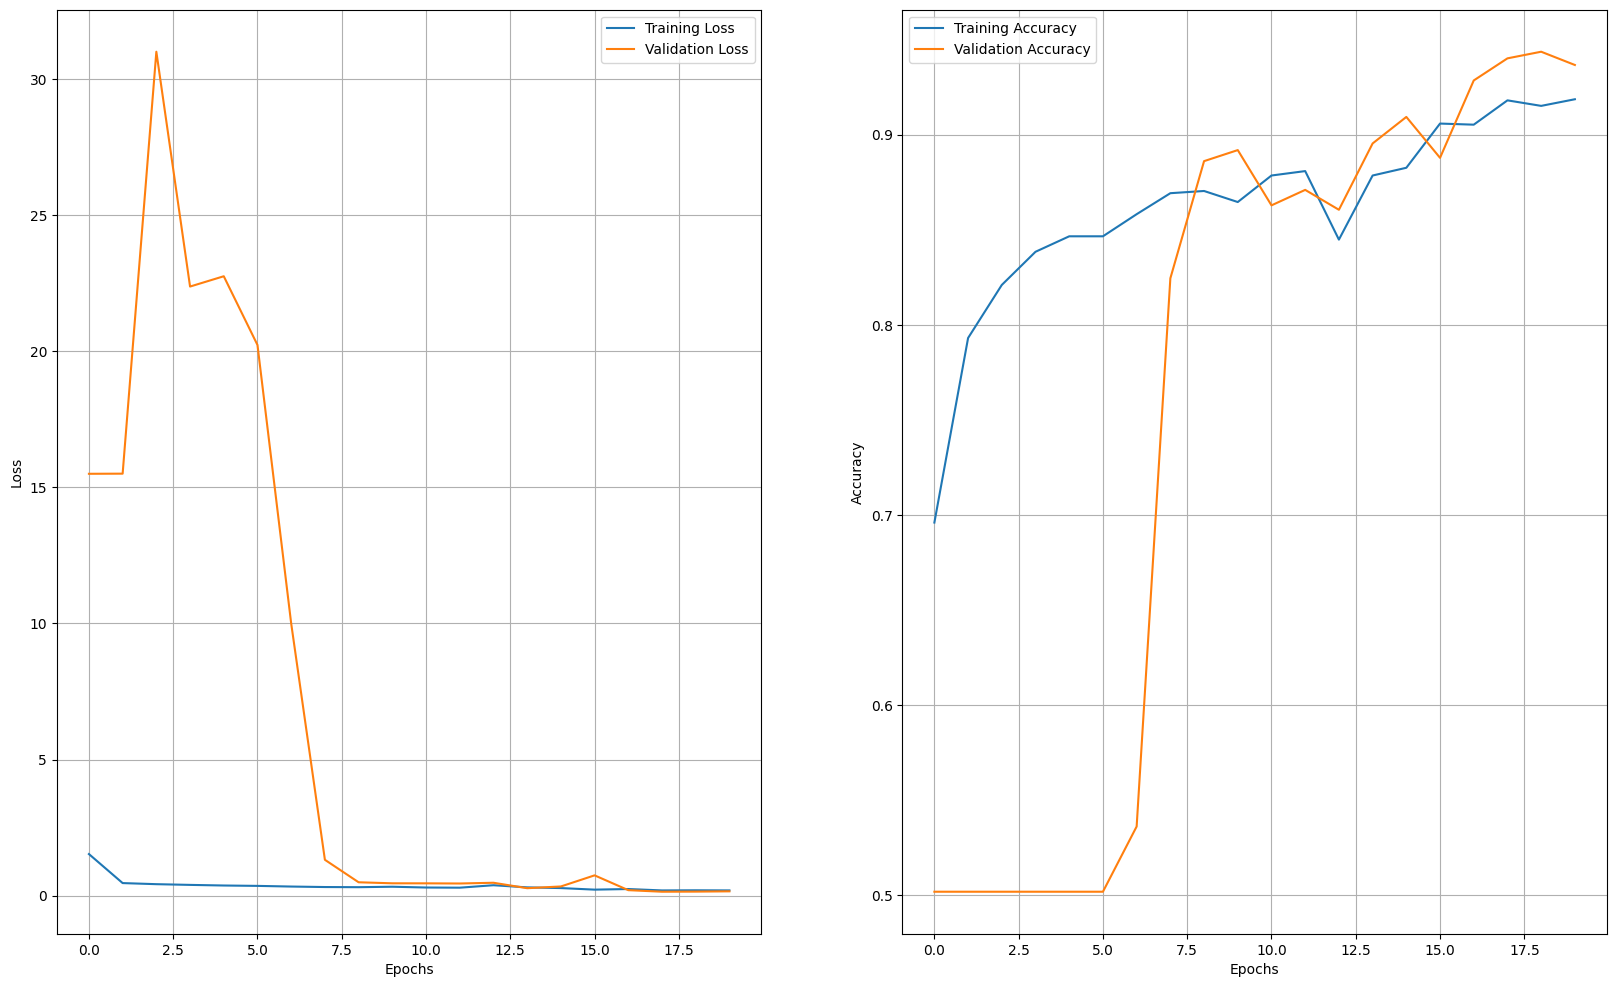

In [ ]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
model.evaluate(X_val,Y_val)

54/54 [==============================] - 26s 477ms/step - loss: 0.1579 - accuracy: 0.9366


[0.15793560445308685, 0.9366279244422913]

In [ ]:
model.save('/content/drive/MyDrive/data/rotten.h5')

In [ ]:
from keras.models import Model, load_model

In [ ]:
new_model=load_model('/content/drive/MyDrive/data/rotten.h5')

In [ ]:
new_model.evaluate(X_val,Y_val)

54/54 [==============================] - 23s 430ms/step - loss: 0.1579 - accuracy: 0.9366


[0.15793560445308685, 0.9366279244422913]

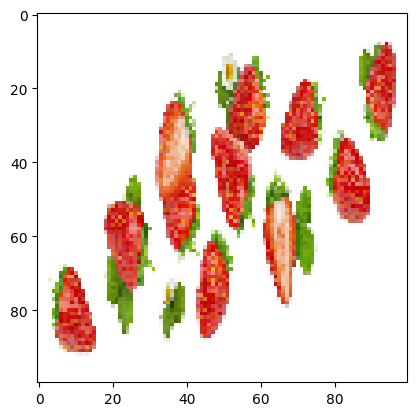

In [ ]:
testImg = plt.imshow(X_val[0])

In [ ]:
print(model.predict(X_val[0].reshape(1,100,100,3))[0] * 100)

1/1 [==============================] - 0s 213ms/step
[0.08806423]


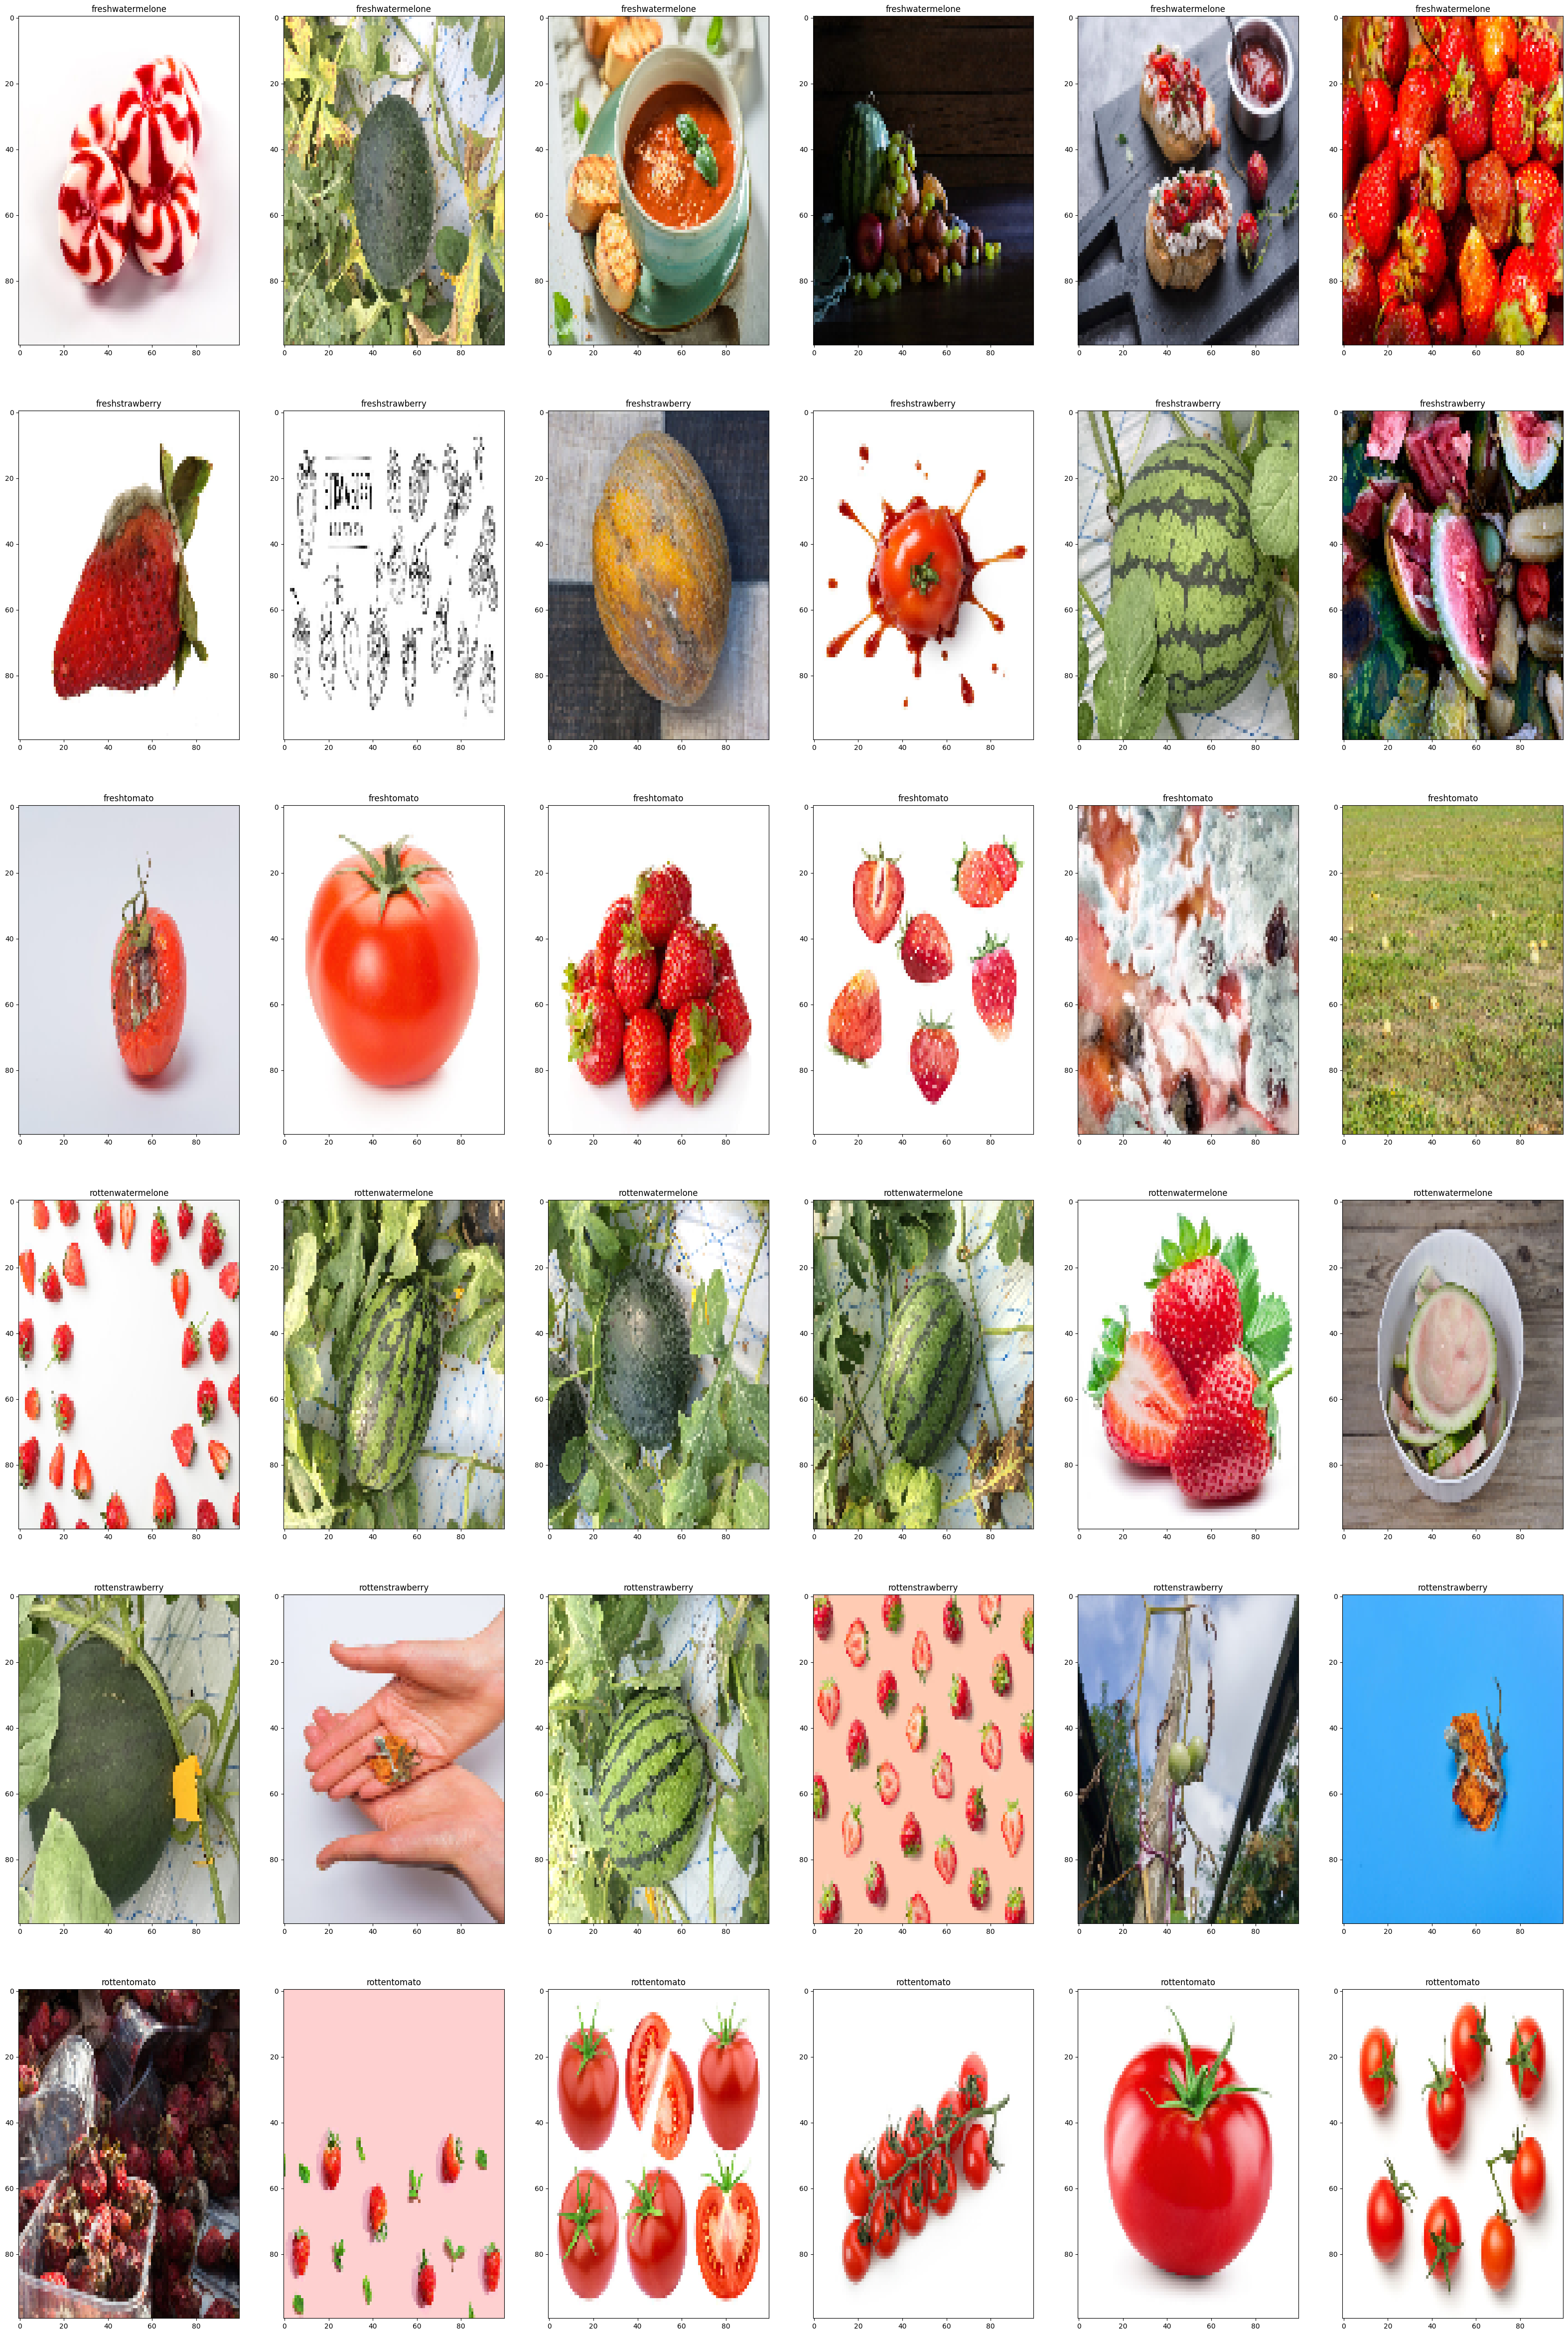

In [ ]:
show_subpot(X_val[-36*11:-36*10])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.7126 - accuracy: 0.4994
Epoch 1: val_loss improved from inf to 0.69284, saving model to /content/drive/MyDrive/data/rotten.h5
86/86 [==============================] - 413s 5s/step - loss: 0.7126 - accuracy: 0.4994 - val_loss: 0.6928 - val_accuracy: 0.5105 - lr: 0.0010
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.7114 - accuracy: 0.5140
Epoch 2: val_loss did not improve from 0.69284
86/86 [==============================] - 407s 5s/step - loss: 0.7114 - accuracy: 0.5140 - val_loss: 0.6999 - val_accuracy: 0.4983 - lr: 0.0010
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.6998 - accuracy: 0.5076
Epoch 3: val_loss did not improve from 0.69284
86/86 [==============================] - 407s 5s/step - loss: 0.6998 - accuracy: 0.5076 - val_loss: 0.6931 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 4/20
86/86 [==============================] - ETA: 0s - loss: 0.7029 - accuracy: 0.5012

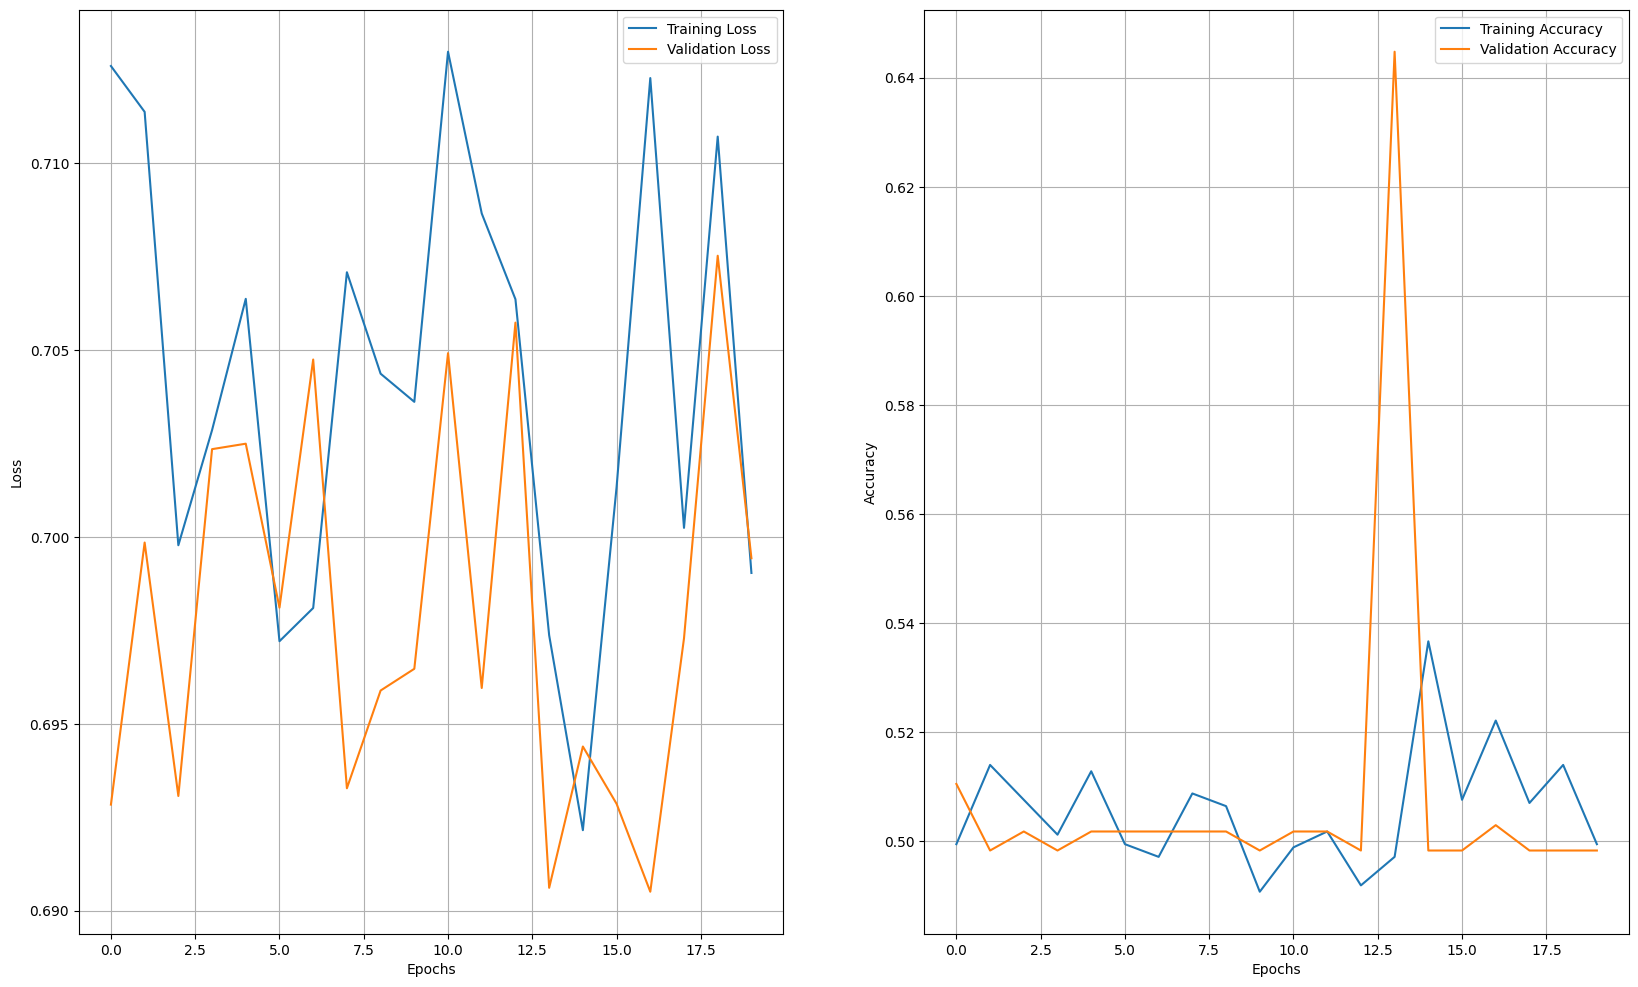

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# VGG16 모델 로드
vgg_model = VGG16(include_top=False, weights='imagenet', input_shape=(100, 100, 3))

# VGG16 모델의 레이어 동결
for layer in vgg_model.layers:
    layer.trainable = False

# 새로운 모델 생성
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 콜백 설정
check_point = ModelCheckpoint('/content/drive/MyDrive/data/rotten.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')
lr_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max', min_lr=0.00002, cooldown=2)

# 학습
history = model.fit(X, Y, batch_size=20, validation_data=(X_val, Y_val), epochs=20, callbacks=[check_point, lr_rate])

# Loss 그래프
plt.figure(1, figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid(True)
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid(True)
plt.legend()



In [ ]:
model.predict_classes(X_val[-36*11:-36*10])

AttributeError: ignored

In [ ]:
predictions = []

# 테스트 데이터셋 불러오기
test_X, test_Y = load_test_data()  # 테스트 데이터를 불러오는 함수 호출

# VGG 모델 로드
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# 모델 예측
for i in range(len(test_X)):
    # 이미지 전처리
    img = cv2.resize(test_X[i], (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape(1, 100, 100, 3)
    img = preprocess_input(img)

    # VGG 모델을 통한 예측
    features = vgg_model.predict(img)
    features = features.reshape(features.shape[0], -1)

    # 예측 결과를 신선도로 변환 (예: 0 - 신선, 1 - 상한)
    prediction = model.predict(features)
    prediction = np.round(prediction).astype(int)  # 신선도 값으로 변환 (0 또는 1)
    predictions.append(prediction)

# 실제값과 예측값 비교
predictions = np.concatenate(predictions, axis=0)
accuracy = accuracy_score(test_Y, predictions)
print(f"Accuracy: {accuracy}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid(True)
plt.legend()

plt.show()